# Lane detection

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import glob
from Config import *
from Common import *
from FindCars import *
from StableCars import *
from Train import *

00:30:06 INFO Common initializing
00:30:06 INFO FindCars initializing
00:30:06 INFO StableCars initializing
00:30:06 INFO Train initializing


## Train

In [ ]:
cfg = Config()
train = Train(cfg, small=False, sample_size=0)
car_features, noncar_features = train.prepare_all_features()

In [ ]:
train.train(car_features, noncar_features)

## Process video 

In [2]:
svc = load_svc()
find = FindCars(svc['cfg'], svc['svc'], svc['scaler'], scales=[1.25])

In [ ]:
def make_samples(starts, length=1):
    stable = StableCars(find, threshold=20, last_n=10, alpha=0.9)
    for start in starts:
        clip = VideoFileClip("project_video.mp4")
        clip = clip.subclip(start, start+length)
        processed = clip.fl_image(stable.stablize)
        processed.write_videofile(('processed_video.{}.mp4').format(start), audio=False)
        
make_samples([1,10,20], length=2)
#make_samples([30,40,50], length=2)

In [3]:
stable = StableCars(find, threshold=20, last_n=10, alpha=0.9)
clip = VideoFileClip("project_video.mp4")
processed = clip.fl_image(stable.stablize)
processed.write_videofile('processed_video.mp4', audio=False)

[MoviePy] >>>> Building video processed_video.mp4
[MoviePy] Writing video processed_video.mp4


100%|█████████▉| 1260/1261 [16:46<00:00,  1.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: processed_video.mp4 



## Visualize 

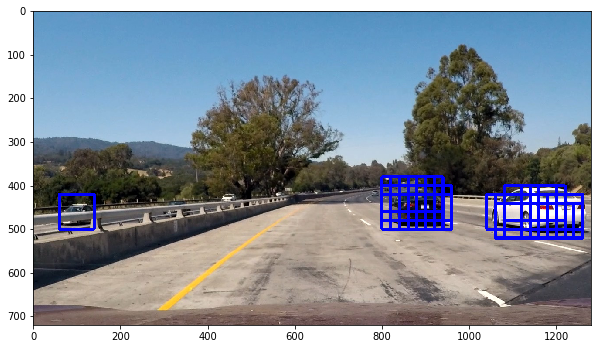

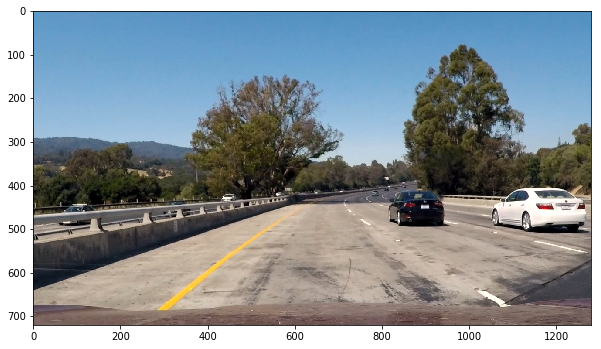

In [5]:
stable = StableCars(find, threshold=20, last_n=10, alpha=0.8)
for img in glob.glob('test_images/test1.jpg'):
    img = mpimg.imread(img)
    img2 = find.draw_cars(img)
    plt.figure(figsize=(10,6))
    plt.imshow(img2)
    img2 = stable.stablize(img)
    plt.figure(figsize=(10,6))
    plt.imshow(img2)